In [1]:
import pandas as pd
import numpy as np
import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
import sklearn.cross_validation as cross_validation
import sklearn.metrics as metrics
import sklearn.tree as tree
import seaborn as sns

C:\Users\PGDMB13049\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
# Importing Adult.data and replacing na with ? value as mentioned in the Project document.

original_data = pd.read_csv("C:/Users/PGDMB13049/Desktop/Acadgild - Doney/Project-3/adult.data.txt",
                            names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
                                   "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
                                   "Hours per week", "Country", "Target"],
                            sep=r'\s*,\s*',
                            engine='python',
                            na_values="?")

In [31]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         30725 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education-Num     32561 non-null int64
Martial Status    32561 non-null object
Occupation        30718 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours per week    32561 non-null int64
Country           31978 non-null object
Target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


In [32]:
original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
import matplotlib
import math
import matplotlib.pyplot as plt
%matplotlib inline

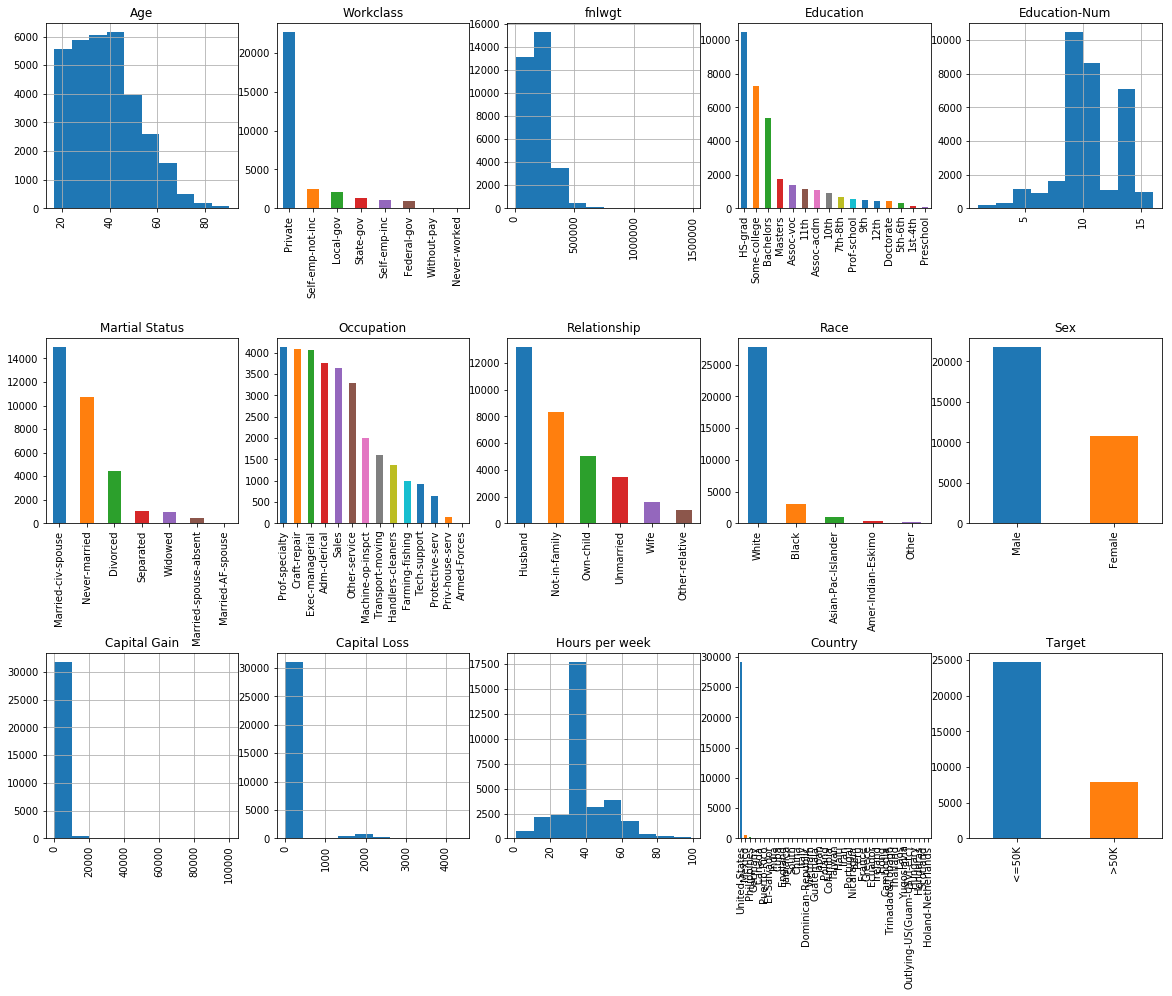

In [33]:
# Feature Distribution of categorical in bar graph and numerical variables in histogram chart

fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(original_data.shape[1]) / cols)
for i, column in enumerate(original_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if original_data.dtypes[column] == np.object:
        original_data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        original_data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [34]:
original_data["Country"].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [35]:
# Distribution of records under specific country.
# US has 90% of data distribution
(original_data["Country"].value_counts() / original_data.shape[0]).head(10)

United-States    0.895857
Mexico           0.019748
Philippines      0.006081
Germany          0.004207
Canada           0.003716
Puerto-Rico      0.003501
El-Salvador      0.003255
India            0.003071
Cuba             0.002918
England          0.002764
Name: Country, dtype: float64

In [36]:
from sklearn import preprocessing

In [37]:
original_data[["Education", "Education-Num"]].head(15)

,Education,Education-Num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
5,Masters,14
6,9th,5
7,HS-grad,9
8,Masters,14
9,Bachelors,13


In [38]:
del original_data["Education"]

In [39]:
original_data[["Sex", "Relationship"]].head(15)

,Sex,Relationship
0,Male,Not-in-family
1,Male,Husband
2,Male,Not-in-family
3,Male,Husband
4,Female,Wife
5,Female,Wife
6,Female,Not-in-family
7,Male,Husband
8,Female,Not-in-family
9,Male,Husband


In [40]:
original_data['Target'] = np.where(original_data['Target']=='>=50',1,0)

In [29]:
original_data.Target.value_counts()

0    32561
Name: Target, dtype: int64

In [ ]:
https://www.valentinmihov.com/2015/04/17/adult-income-data-set/
http://jasdumas.com/2016-05-04-RF-in-python/